In [74]:
import pandas as pd
import seaborn as sns
import tldextract

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [59]:
datas = pd.read_csv('etc/urlset.csv')

In [60]:

datas = datas.drop(datas.columns[1:-1], axis=1)

In [61]:
## Top 10 brands phising target (https://www.cybertalk.org/2020/05/04/top-10-brands-phishing-companies/)
datas['subdomain_contains_bigcompany_name'] = datas.domain.apply(lambda x: tldextract.extract(x).subdomain).str.match('facebook|yahoo|netflix|paypal|microsoft|spotify|apple|google|chase|ray-ban')

In [62]:
## Ideal subdomain length for SEO (https://easymysite.com/blogger-limitations/)
datas['subdomain_length_gt_37'] = datas.domain.apply(lambda x: len(tldextract.extract(x).subdomain) > 37)

In [63]:
## URL Redirection to Untrusted Site (https://cwe.mitre.org/data/definitions/601.html)
## Payload detection: https://github.com/projectdiscovery/nuclei-templates/blob/245450ba0388c8c0db5fbe114a03e2ad214734bb/vulnerabilities/open-redirect.yaml
datas['open_redirects'] = datas.domain.str.match('(.*)Page\=|(.*)_url\=|(.*)callback\=|(.*)checkout_url\=|(.*)content\=|(.*)continue\=|(.*)continueTo\=|(.*)counturl\=|(.*)data\=|(.*)dest\=|(.*)dest_url\=|(.*)dir\=|(.*)document\=|(.*)domain\=|(.*)done\=|(.*)download\=|(.*)feed\=|(.*)file\=|(.*)host\=|(.*)html\=|(.*)http\=|(.*)https\=|(.*)image\=|(.*)image_src\=|(.*)image_url\=|(.*)imageurl\=|(.*)include\=|(.*)langTo\=|(.*)media\=|(.*)navigation\=|(.*)next\=|(.*)open\=|(.*)out\=|(.*)page\=|(.*)page_url\=|(.*)pageurl\=|(.*)path\=|(.*)picture\=|(.*)port\=|(.*)proxy\=|(.*)redir\=|(.*)redirect\=|(.*)redirectUri\=|(.*)redirectUrl\=|(.*)reference\=|(.*)referrer\=|(.*)req\=|(.*)request\=|(.*)retUrl\=|(.*)return\=|(.*)returnTo\=|(.*)return_path\=|(.*)return_to\=|(.*)rurl\=|(.*)show\=|(.*)site\=|(.*)source\=|(.*)src\=|(.*)target\=|(.*)to\=|(.*)uri\=|(.*)url\=|(.*)val\=|(.*)validate\=|(.*)view\=|(.*)window\=|(.*)redirect_to\=')

In [64]:
## Phising with short links (https://www.cyren.com/blog/articles/bank-phishing-scam-is-using-shortened-links)
datas['short_links'] = datas.domain.str.match('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net')

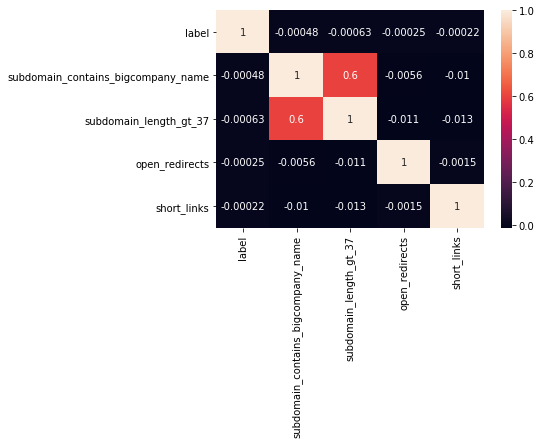

In [65]:
## Check feature correlation
sns.heatmap(datas[datas.columns[1:]].corr(), annot=True)

In [66]:
datas['label'] = datas.label == 1

In [67]:
training_set, test_set = train_test_split(datas, test_size = 0.2, random_state = 1)

In [68]:
X_train = training_set.iloc[:,2:].values
Y_train = training_set.iloc[:,1].values
X_test = test_set.iloc[:,2:].values
Y_test = test_set.iloc[:,1].values

In [69]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [70]:
Y_pred = knn.predict(X_test)
test_set["label"] = Y_pred

In [72]:
print(classification_report(Y_test,Y_pred.round()))
print(accuracy_score(Y_test, Y_pred.round()))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     18195
        True       1.00      1.00      1.00       988

   micro avg       1.00      1.00      1.00     19183
   macro avg       1.00      1.00      1.00     19183
weighted avg       1.00      1.00      1.00     19183

1.0


In [75]:
adb = AdaBoostClassifier(random_state=1)
adb.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=1)

In [77]:
Y_pred = adb.predict(X_test)
test_set["label"] = Y_pred

In [78]:
print(classification_report(Y_test,Y_pred.round()))
print(accuracy_score(Y_test, Y_pred.round()))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     18195
        True       1.00      1.00      1.00       988

   micro avg       1.00      1.00      1.00     19183
   macro avg       1.00      1.00      1.00     19183
weighted avg       1.00      1.00      1.00     19183

1.0
